In [1]:
from scipy.stats import norm
import numpy as np
import scipy as sp
from pandas.core import datetools 
import pandas as pd
import statsmodels.api as sm ## R 패키지에서 불러온것, 샘플데이터 옮겨쓸수 있는 프로젝트 있음. 회귀분석에 유용 
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk 
## 전처리 

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  after removing the cwd from sys.path.


## 보스턴 주택 가격 데이터
#### 1970년대 미국 보스턴의 주택 가격 데이터이다. load_boston() 명령으로 로드하며 다음과 같이 구성되어 있다.

#### 타겟 데이터 (1978 보스턴 주택 가격)
506 타운의 주택 가격 중앙값 (단위 1,000 달러)

* 특징 데이터
 - CRIM: 범죄율
 - INDUS: 비소매상업지역 면적 비율
 - NOX: 일산화질소 농도
 - RM: 주택당 방 수
 - LSTAT: 인구 중 하위 계층 비율
 - B: 인구 중 흑인 비율
 - PTRATIO: 학생/교사 비율
 - ZN: 25,000 평방피트를 초과 거주지역 비율
 - CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
 - AGE: 1940년 이전에 건축된 주택의 비율
 - RAD: 방사형 고속도로까지의 거리
 - DIS: 직업센터의 거리
 - TAX: 재산세율

## 보스턴 집값 데이터의 카테고리 변수

보스턴 집값 데이터는 CHAS라는 카테고리 변수를 가지고 있다. 이 변수는 0과 1 두 개의 값(클래스)를 가지므로 이미 더미 변수로 변환되어 있는 것과 비슷하다.

즉 다음과 같은 두 개의 모형을 회귀분석하는 경우라고 볼 수 있다.

CHAS = 1 인 경우,
y=w0+w1+w2CRIM+w3ZN+⋯
y=w0+w1+w2CRIM+w3ZN+⋯
 
CHAS = 0 인 경우,
y=w0+w2CRIM+w3ZN+⋯

In [8]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX0_boston = pd.DataFrame(boston.data, columns = boston.feature_names)
dfX0_boston ## Chas - 카테고리 값으로 0,1로 나뉨

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [10]:
dfX_boston = sm.add_constant(dfX0_boston)
dfX_boston ## 상수항 생성  - 회귀계수 W hat의 coef 행렬에서 상수항 계수(coef)를 확인하기 위해 

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,1.0,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,1.0,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,1.0,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,1.0,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,1.0,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [13]:
dfy_boston = pd.DataFrame(boston.target, columns = ["MEDV"])
dfy_boston.T

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
MEDV,24.0,21.6,34.7,33.4,36.2,28.7,22.9,27.1,16.5,18.9,...,19.7,18.3,21.2,17.5,16.8,22.4,20.6,23.9,22.0,11.9


In [15]:
df_boston = pd.concat([dfX_boston, dfy_boston],axis = 1)
df_boston ## 독립변수 값 + 종속 변수 값 합침

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,1.0,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,1.0,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,1.0,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,1.0,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,1.0,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [19]:
model = sm.OLS(dfy_boston, dfX_boston)
result = model.fit()## 모형 자동으로 찾아줌
print(result.summary()) ## 상수항 const coef = 36.4911, CHAS coef = 2.6886


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 17 Oct 2017   Prob (F-statistic):          6.95e-135
Time:                        18:15:52   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

In [21]:
parameter_CHAS = result.params.drop("CHAS")
parameter_CHAS ## CHAS coef를 떼어버림 ## 상수항 const = 36.491103

const      36.491103
CRIM       -0.107171
ZN          0.046395
INDUS       0.020860
NOX       -17.795759
RM          3.804752
AGE         0.000751
DIS        -1.475759
RAD         0.305655
TAX        -0.012329
PTRATIO    -0.953464
B           0.009393
LSTAT      -0.525467
dtype: float64

In [27]:
params2 = parameter_CHAS.copy()
params2['const'] += result.params['CHAS']
params2 
## 상수항 const = 39.179665 즉, 찰스강이 주변에 있으면 집값의 상수항은 39.17이 된다. 
## 찰스강이 주변에 없으면 기본상수항인 36.49이 된다 

const      39.179665
CRIM       -0.107171
ZN          0.046395
INDUS       0.020860
NOX       -17.795759
RM          3.804752
AGE         0.000751
DIS        -1.475759
RAD         0.305655
TAX        -0.012329
PTRATIO    -0.953464
B           0.009393
LSTAT      -0.525467
dtype: float64

## 월별기온데이터 회귀분석 , 결과 = 월에 대한 평균기온

#### A time series object containing average air temperatures at Nottingham Castle in degrees Fahrenheit for 20 years
Average Monthly Temperatures at Nottingham, 1920–1939

In [31]:
df = sm.datasets.get_rdataset("nottem").data
df.tail() ## 240개 데이터셋, time 과 nottem 이 있음 ## nottem은 fehrenheit 온도

,time,nottem
235,1939.583333,61.8
236,1939.666667,58.2
237,1939.750000,46.7
238,1939.833333,46.6
239,1939.916667,37.8


In [64]:
import datetime
from calendar import isleap

def convert_partial_year(number): 
    year = int(number)
    d = datetime.timedelta(days=(number-year)*(365 + isleap(year)))
    day_one = datetime.datetime(year, 1, 1)
    date = d + day_one
    return date

convert_partial_year(1935.583333)
d = datetime.timedelta(days=(1935.583333-1935)*(365 + isleap(1935)))
d

datetime.timedelta(212, 79189, 488001)

In [65]:
df['date0'] = df[['time']].applymap(convert_partial_year)
df['date0'].tail()

235   1939-08-01 21:59:59.999897
236   1939-09-01 08:00:00.000103
237   1939-10-01 18:00:00.000000
238   1939-11-01 03:59:59.999897
239   1939-12-01 14:00:00.000103
Name: date0, dtype: datetime64[ns]

In [71]:
df['date'] = pd.DatetimeIndex(df['date0']).round('60min')+ datetime.timedelta(seconds = 3600*24)
df['date'].tail()

235   1939-08-02 22:00:00
236   1939-09-02 08:00:00
237   1939-10-02 18:00:00
238   1939-11-02 04:00:00
239   1939-12-02 14:00:00
Name: date, dtype: datetime64[ns]

In [77]:
df['month'] = df['date'].dt.strftime('%m').astype('category')
df['month'].tail()

235    08
236    09
237    10
238    11
239    12
Name: month, dtype: category
Categories (12, object): [01, 02, 03, 04, ..., 09, 10, 11, 12]

In [79]:
df.tail()

,time,nottem,date0,date,month
235,1939.583333,61.8,1939-08-01 21:59:59.999897,1939-08-02 22:00:00,08
236,1939.666667,58.2,1939-09-01 08:00:00.000103,1939-09-02 08:00:00,09
237,1939.750000,46.7,1939-10-01 18:00:00.000000,1939-10-02 18:00:00,10
238,1939.833333,46.6,1939-11-01 03:59:59.999897,1939-11-02 04:00:00,11
239,1939.916667,37.8,1939-12-01 14:00:00.000103,1939-12-02 14:00:00,12


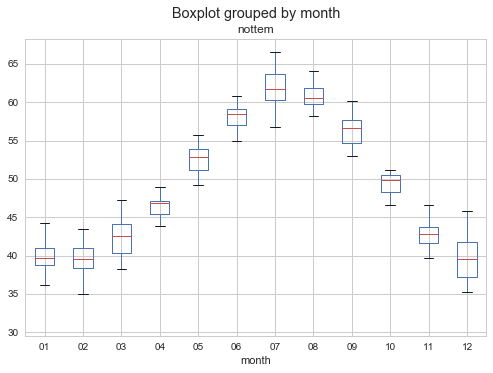

In [80]:
df.boxplot('nottem','month')

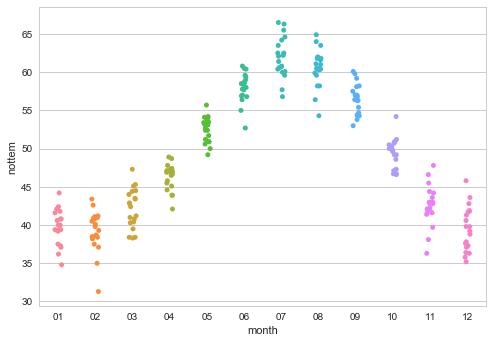

In [89]:
sns.stripplot(x ='month', y='nottem', data = df, jitter = True)

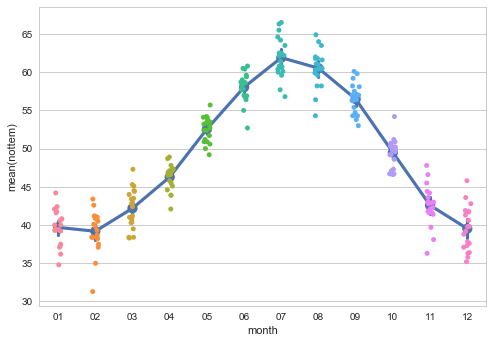

In [93]:
sns.stripplot(x ='month', y='nottem', data = df, jitter = True)
sns.pointplot(x ='month', y='nottem', data = df, dodge =True)